Dataset caricato: 506 righe, 14 colonne

Prime 5 righe:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2   

Statistiche descrittive:
         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46

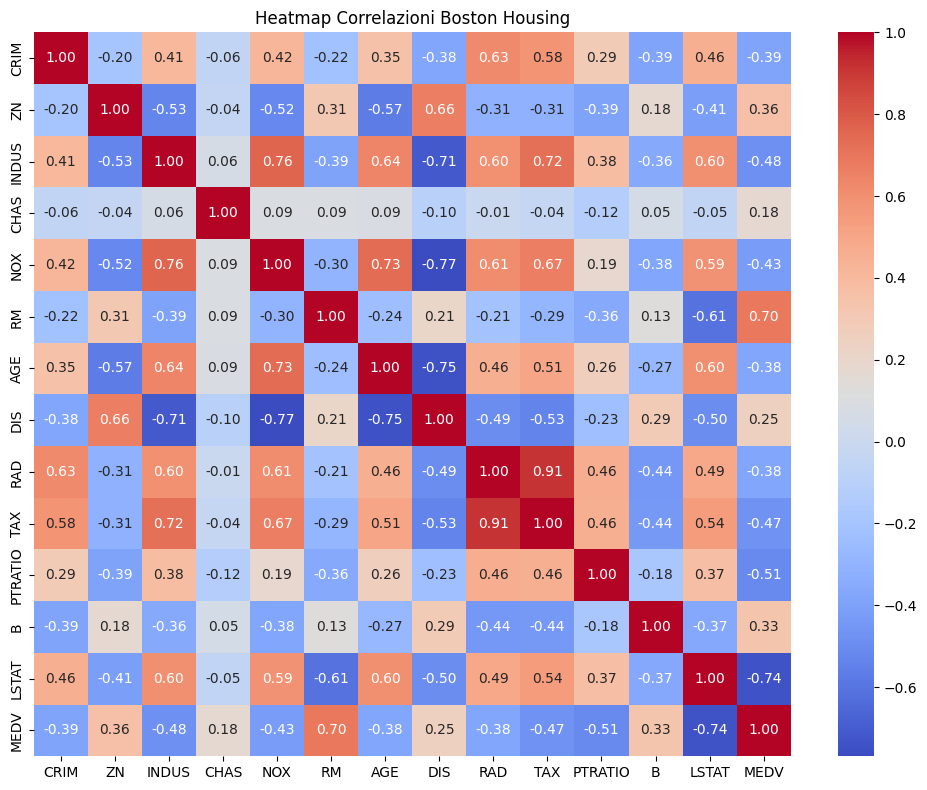

Training set: 253 esempi, Test set: 253 esempi

Modello allenato con PolynomialFeatures(degree= 2 ).

Test RMSE: 6.581
Test R²:   0.536



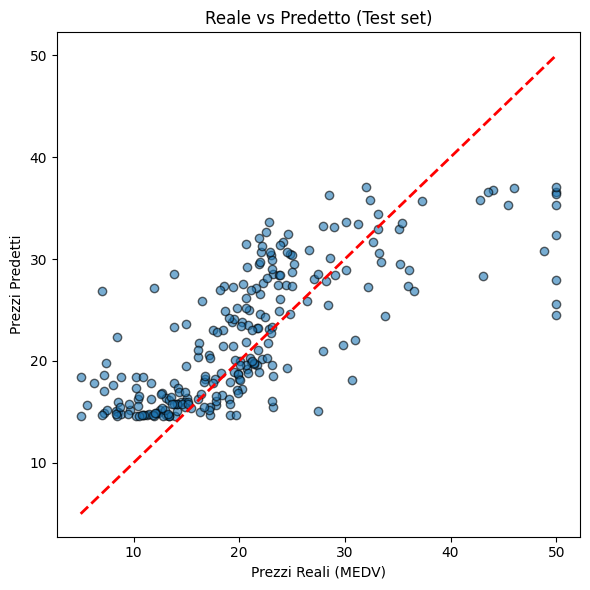

In [2]:
"""
boston_regression.py

Studio di correlazioni e regressione polinomiale (grado 2) su Boston Housing:
- Calcolo matrice di correlazione e heatmap
- Selezione della feature LSTAT
- Split 50% train / 50% test
- Modello PolynomialFeatures + LinearRegression
- Valutazione RMSE e R²
- Grafico Reale vs Predetto
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def main():
    # --- CONFIGURAZIONE ---
    DATA_PATH = 'C:/Users/giann/Documents/GitHub/Bostonshouse/boston.csv'  # o percorso completo, es. '/percorso/a/boston.csv'
    POLY_DEGREE = 2           # grado del polinomio per la regressione
    TEST_RATIO = 0.5          # percentuale di dati usata per il test

    # 1) Carica il dataset
    if not os.path.exists(DATA_PATH):
        raise FileNotFoundError(f"Impossibile trovare il file: {DATA_PATH}")
    df = pd.read_csv(DATA_PATH)
    print(f"Dataset caricato: {df.shape[0]} righe, {df.shape[1]} colonne")

    # 2) Statistiche di base
    print("\nPrime 5 righe:")
    print(df.head(), "\n")
    print("Statistiche descrittive:")
    print(df.describe().T, "\n")

    # 3) Calcola matrice di correlazione
    corr = df.corr()
    print("Matrice di correlazione calcolata.\n")

    # 4) Visualizza la heatmap delle correlazioni
    plt.figure(figsize=(10,8))
    plt.title("Heatmap Correlazioni Boston Housing")
    sns = None
    try:
        import seaborn as sns
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    except ImportError:
        plt.imshow(corr, interpolation='none', cmap='coolwarm')
        plt.colorbar()
        plt.xticks(range(len(corr)), corr.columns, rotation=90)
        plt.yticks(range(len(corr)), corr.columns)
    plt.tight_layout()
    plt.show()

    # 5) Seleziona la feature LSTAT e la target MEDV
    X = df[['LSTAT']].values
    y = df['MEDV'].values

    # 6) Suddividi in training / test
    split_idx = int((1 - TEST_RATIO) * len(df))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    print(f"Training set: {len(X_train)} esempi, Test set: {len(X_test)} esempi\n")

    # 7) Trasforma le feature in polinomio
    poly = PolynomialFeatures(degree=POLY_DEGREE, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    # 8) Allena il modello
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    print("Modello allenato con PolynomialFeatures(degree=", POLY_DEGREE, ").\n")

    # 9) Valutazione sul test set
    y_pred = model.predict(X_test_poly)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)
    print(f"Test RMSE: {rmse:.3f}")
    print(f"Test R²:   {r2:.3f}\n")

    # 10) Grafico Reale vs Predetto
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    mn, mx = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
    plt.plot([mn, mx], [mn, mx], 'r--', lw=2)
    plt.xlabel("Prezzi Reali (MEDV)")
    plt.ylabel("Prezzi Predetti")
    plt.title("Reale vs Predetto (Test set)")
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()
